# Trabalho 5 - Processamento Digital de Imagens
Semestre 2023/1
## Implementação da DWT de Haar 2D
      Professor: Alexandre L. M. Levada
      Aluno: Leticia Bossatto Marchezi
      RA: 791003

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [172]:
img = PIL.Image.open("boat.tif")
img2 = img.resize((64,64))
img_array = np.array(img2)

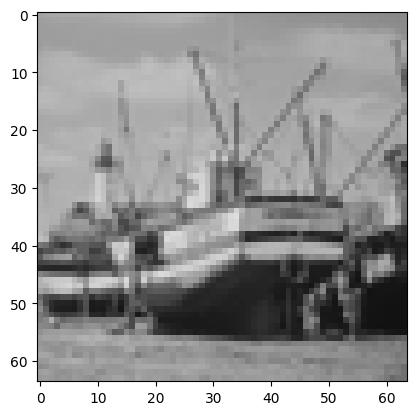

In [173]:
plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)
plt.show()

In [174]:
# Input the size of the square matrix
# Returns the square matrix of coefficients (scaling or wavelet)
def coef_matrix(size_matrix,type_coef):
    matrix = np.zeros((size_matrix,size_matrix))


    for i in range(size_matrix):
        for j in range(size_matrix):
            if j==i*2:
                matrix[i, j] = 1 / np.sqrt(2)
            elif j==i*2+1 and type_coef == "wavelet":
                    matrix[i, j] = - 1 / np.sqrt(2)
            elif j==i*2+1 and type_coef == "scaling":
                matrix[i, j] = 1 / np.sqrt(2)
    return matrix 

In [175]:
matrix_ex = coef_matrix(10,"wavelet")
print(matrix_ex)

[[ 0.70710678 -0.70710678  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.70710678 -0.70710678  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.70710678 -0.70710678
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.70710678 -0.70710678  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.70710678 -0.70710678]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.   

In [182]:
# Wavelet 2D of Haar
def wavelet2D(input_2d, level):
    output_detail = []
    for _ in range(level+1):
        len_row,len_col = input_2d.shape
        # Scaling coefficients matrix
        scale_matrix = coef_matrix(len_row,"scaling")
        # Details coefficients matrix
        wavelet_matrix = coef_matrix(len_row,"wavelet")

        # 1. Calculates 1-D DWT for each line 
        coef_row_scaling = np.array([np.dot(input_line, scale_matrix) for input_line in input_2d])
        coef_row_wavelet = np.array([np.dot(input_line, wavelet_matrix) for input_line in input_2d])
        
        # Scaling coefficients matrix
        scale_matrix = coef_matrix(len_col,"scaling")
        # Details coefficients matrix
        wavelet_matrix = coef_matrix(len_col,"wavelet")

        # 2. Calculates 1-D DWT for each column 
        output_approx= np.array([np.dot(input_line, scale_matrix) for input_line in np.transpose(coef_row_scaling)])
        col_wavelet = np.array([np.dot(input_line, wavelet_matrix) for input_line in np.transpose(coef_row_wavelet)])

        output_detail.append(col_wavelet)
        
        input_2d = output_approx


    return output_approx,output_detail

In [183]:
resultado_test = wavelet2D(img_array,2)
resultado_test

(array([[20.5  , 20.5  , 20.5  , ..., 20.875, 20.875, 20.875],
        [20.5  , 20.5  , 20.5  , ..., 20.875, 20.875, 20.875],
        [20.5  , 20.5  , 20.5  , ..., 20.875, 20.875, 20.875],
        ...,
        [21.125, 21.125, 21.125, ..., 20.625, 20.625, 20.625],
        [21.125, 21.125, 21.125, ..., 20.625, 20.625, 20.625],
        [21.125, 21.125, 21.125, ..., 20.625, 20.625, 20.625]]),
 [array([[ 82. , -82. ,  79.5, ..., -87. ,  87.5, -87.5],
         [-82. ,  82. , -79.5, ...,  87. , -87.5,  87.5],
         [ 83. , -83. ,  80. , ..., -83. ,  84. , -84. ],
         ...,
         [-83. ,  83. , -80.5, ...,  70. , -66. ,  66. ],
         [ 80.5, -80.5,  78.5, ..., -52.5,  43. , -43. ],
         [-80.5,  80.5, -78.5, ...,  52.5, -43. ,  43. ]]),
  array([[ 41.  , -41.  ,  41.  , ..., -42.5 ,  42.5 , -42.5 ],
         [-41.  ,  41.  , -41.  , ...,  42.5 , -42.5 ,  42.5 ],
         [ 41.  , -41.  ,  41.  , ..., -42.5 ,  42.5 , -42.5 ],
         ...,
         [-46.25,  46.25, -46.25, ...

In [184]:
reconstructed = pywt.idwt2(resultado_test,'haar')

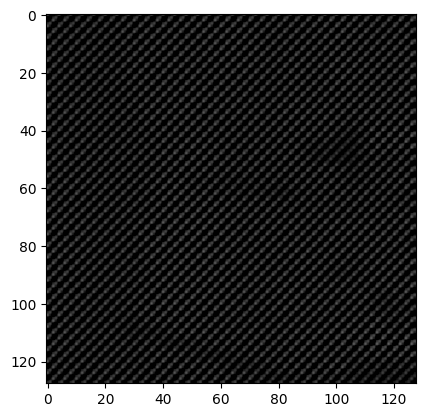

In [185]:
import pywt

plt.imshow(reconstructed, cmap='gray', vmin=0, vmax=255)
plt.show()